In [170]:
!pip install descartes

In [165]:
!pip install geopandas

    100% |████████████████████████████████| 901kB 14.2MB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 21.1MB/s ta 0:00:01
    100% |████████████████████████████████| 24.5MB 2.3MB/s eta 0:00:01
    100% |████████████████████████████████| 12.8MB 4.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /Users/lucyhayes/Library/Caches/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [260]:
!pip install ffmpy

  Running setup.py bdist_wheel for ffmpy ... done
  Stored in directory: /Users/lucyhayes/Library/Caches/pip/wheels/16/28/57/96aff0d874198125b03f542d854e7ebdc61a56b09a4d49de6a
Successfully built ffmpy


# Mod 4 Project - Lucy Hayes

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
# Import Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
import statsmodels.api as sm
import geopandas as gpd
import descartes
import ffmpy
import imageio
from pandas.tools.plotting import andrews_curves
plt.style.use('ggplot')

In [2]:
# Read in Dataframe
zillow = pd.read_csv("zillow_data.csv")
zillow.head(15)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


Immediately you can see a few things. First, the dataframe is in wide format and in order to do time series analysis I will need to reshape it to Long format. Secondly, it's a super large dataset, so for the purpose of analysis not taking hours to run, I will set the analysis to be of zipcodes only in Brooklyn (somewhere I'm familiar with where the data will make more "sense" to me). First Step is to select for NY, and then for Brooklyn (which is listed as Kings in this dataset). 

In [3]:
nystate = zillow.loc[zillow['State'].isin(['NY'])] 
nystate = nystate.loc[nystate['CountyName'].isin(['Kings'])]

In [4]:
len(nystate.RegionName.unique())

28

The dataset is now only 28 zipcodes which will be easier to run the ARIMA models on down the line. Next I will reformat it so the index is the time series

# Step 2: Reshape from Wide to Long Format and Convert to Datetime

In [5]:
# Melt Dataframe
columns = ["RegionID", "RegionName", "City", "State", "Metro", "CountyName", "SizeRank"]
df = pd.melt(nystate, columns, var_name = 'time')

In [6]:
# Convert to DateTime
df.time = pd.to_datetime(df.time)

In [7]:
# DropNAs
df_bk = df.dropna(subset = ['value'])

In [8]:
# Set Index
df_bk.set_index('time', inplace = True)

In [9]:
df_bk.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,62037,11226,New York,NY,New York,Kings,11,162000.0
1996-04-01,62045,11235,New York,NY,New York,Kings,14,190500.0
1996-04-01,62040,11230,New York,NY,New York,Kings,48,230100.0
1996-04-01,62020,11209,New York,NY,New York,Kings,50,255700.0
1996-04-01,62023,11212,New York,NY,New York,Kings,54,125000.0


In [10]:
#Clean up to only include relevant information
df_bk = df_bk.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis = 1)

Here we switched the format of the data to be from wide to long, converted the time object to a datetime object, and dropped the columns that we don't need anymore for a cleaner dataset. Next I want to explore the data a little bit to get an idea of its shape before performing analysis on it. 

# Step 3: Exploring and Visualizing Data

To start, I will plot out every zipcode over time to see if there are any visual trends that stick out right away

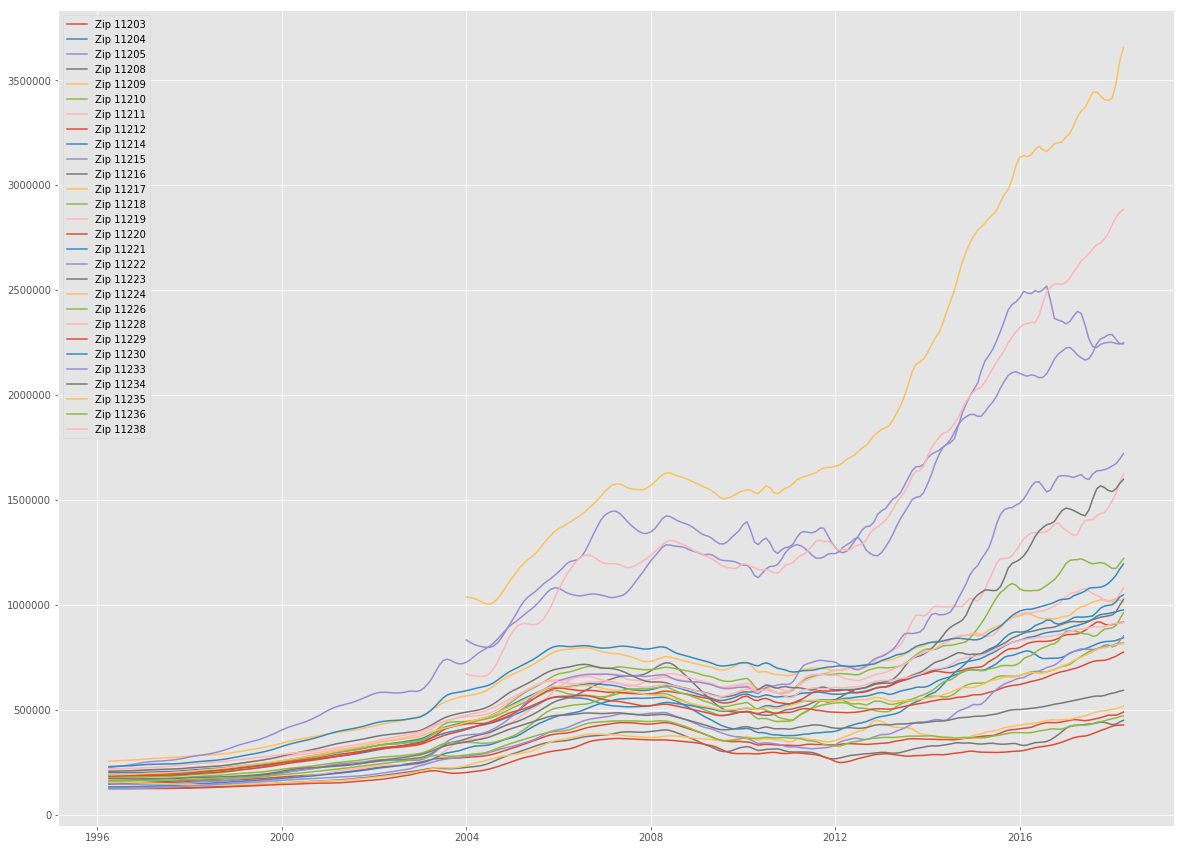

In [11]:
# Plot of all BK Zipcodes 
fig, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 15) )

for key, grp in df_bk.groupby(['RegionName']): 
    ax2.plot( grp['value'], label = "Zip {0:02d}".format(key))
plt.legend(loc='best')    
plt.show()

Right away we can see that we're missing data for some zipcodes pre-2004. Another observation is how much more spread the data gets as you move forward in time - knowing Brooklyn this is definitely on trend with Gentrification and groups moving into Brooklyn as the rent prices in Manhattan continue to rise

In [12]:
# It looks like we're missing data for pre-2004. Let's reevaluate the dataset to be from 2004-2018 instead
ny_2004 = df_bk[2004:]

In [13]:
# Rename Columns
ny_2004.columns = ['ZIPCODE', 'Median']

I wanted to play with some GIS data to see how data looks spatially - this required getting GIS zipcode data from public resouces, filtering it so it only contained brooklyn, and then merging it with the zillow data 

In [14]:
# Read in GIS Data From Repo
fp = 'ZIPS/ZIP_CODE_040114.shp'
map_df = gpd.read_file(fp)

In [15]:
map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
ZIPCODE       263 non-null object
BLDGZIP       263 non-null object
PO_NAME       263 non-null object
POPULATION    263 non-null float64
AREA          263 non-null float64
STATE         263 non-null object
COUNTY        263 non-null object
ST_FIPS       263 non-null object
CTY_FIPS      263 non-null object
URL           263 non-null object
SHAPE_AREA    263 non-null float64
SHAPE_LEN     263 non-null float64
geometry      263 non-null object
dtypes: float64(4), object(9)
memory usage: 26.8+ KB


In [16]:
# Select Just Brooklyn
map_df= map_df.loc[map_df['COUNTY'].isin(['Kings'])]

In [17]:
# Cast Zipcode as int64 so it will match other dataframe
map_df['ZIPCODE'] = map_df['ZIPCODE'].astype('int64')

In [18]:
len(map_df.ZIPCODE.unique())

40

Knowing that our dataset only has 29 zipcodes and this has 40, I will move forward with the visualizing knowing that some of the data for zipcodes will not be there

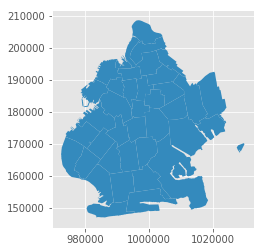

In [19]:
# Plot to see if it works
map_df.plot()

Great! We now just have a map of Brooklyn. In order to create maps of each year, I will have to left join subsets of my dataset(by year) with the GIS map dataframe. I created a plotting function so that plotting would be faster. My approach afterwards is to create a map for every year in the dataset (median value is grouped by year average). Afterwards, I can use those maps as "frames" to create an animation that shows the change in median income over time. 

In [20]:
# Function to Plot Map and save it to repo with the title of th year being used
def map_plotting(df, variable, year):
    variable = variable
    # set the range for the choropleth
    vmin, vmax = 120, 220
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))
    ax.axis('off')
    ax.set_title(year, fontdict={'fontsize': '25', 'fontweight' : '3'})
    df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor= '0.8')
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)
    variable = 'Median'
    fig.savefig(year+'.png', dpi=300)

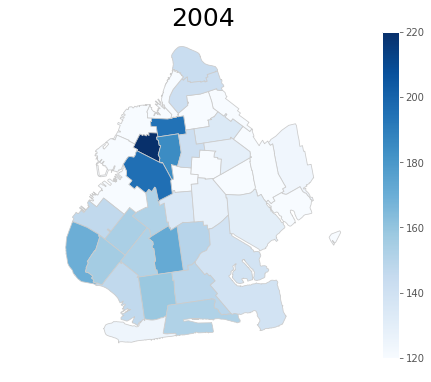

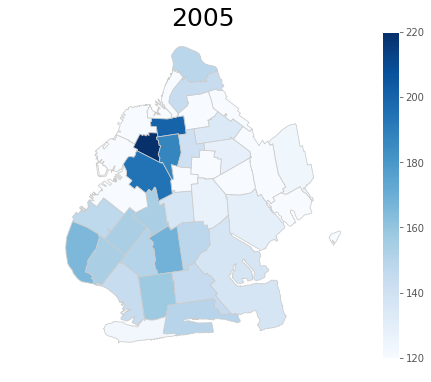

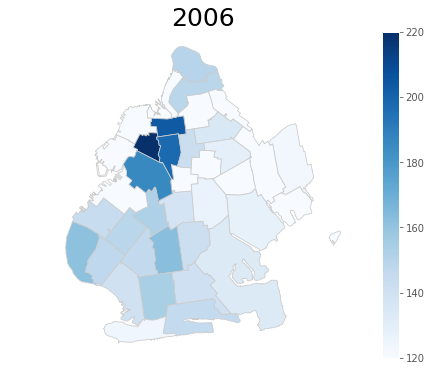

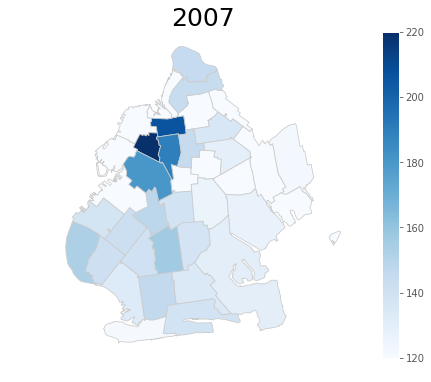

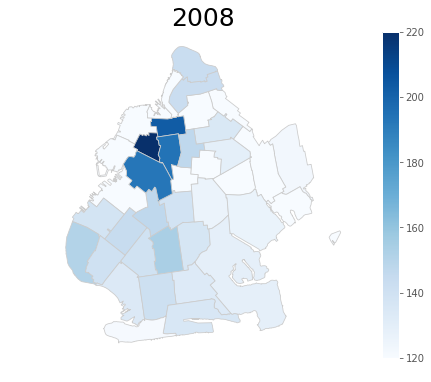

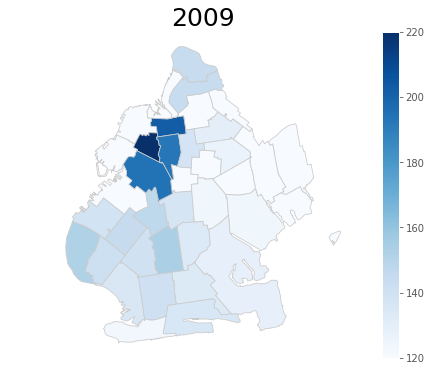

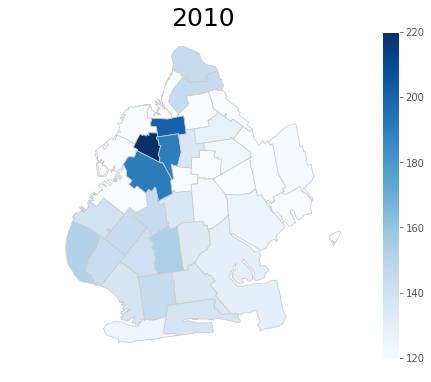

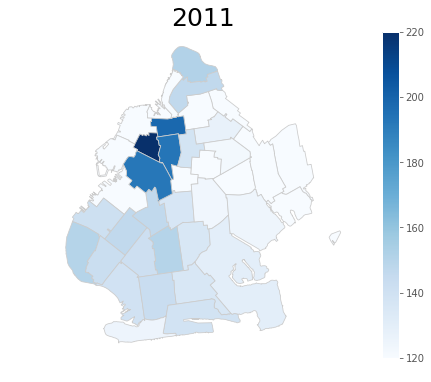

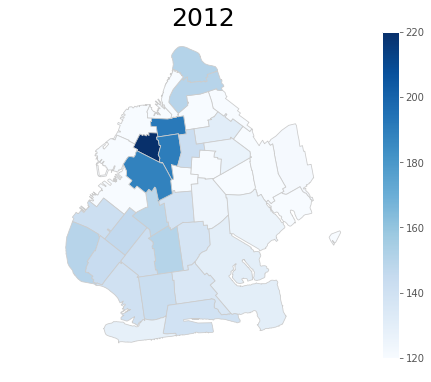

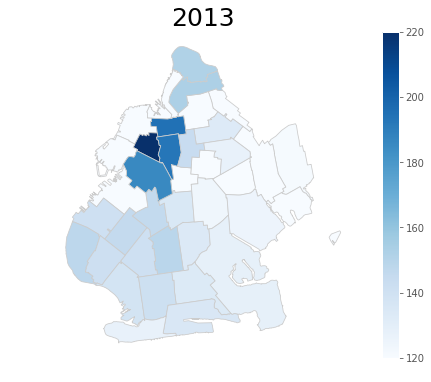

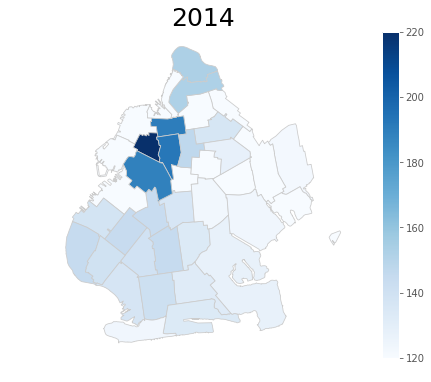

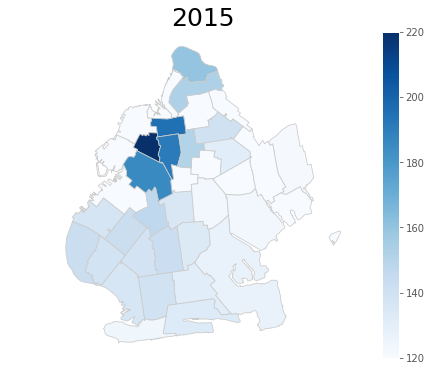

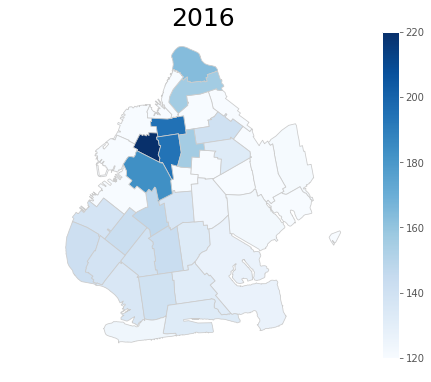

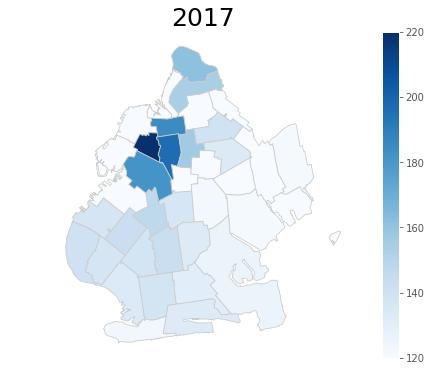

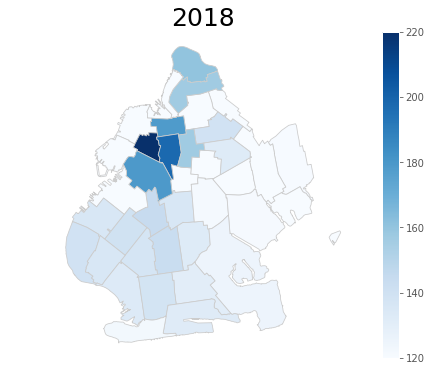

In [280]:
# Mapping every year in the dataset
years = ['2004', '2005', '2006', '2007', '2008', '2009', '2010', 
        '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

# For loop to select data by each year and save a map 
for year in years:
    df = ny_2004[year].groupby('ZIPCODE').resample('AS').mean()
    #merging the two dataframes
    m = map_df.merge(df, how='left', on="ZIPCODE")
    map_plotting(m, 'Median', year)

In [281]:
# Turn frame files into a gif
images = []
filenames = ['2004.png', '2005.png', '2006.png', '2007.png', '2008.png', '2009.png', '2010.png', 
        '2011.png', '2012.png', '2013.png', '2014.png', '2015.png', '2016.png', '2017.png', '2018.png']

for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images, duration = 1)

We now have a gif that shows the median house value by year, relative to all other zipcodes! It's interesting to see how the disparity changes as time moves forward. Clearly there are a few zipcodes that are consistently higher than the others, but as time moves forward they continue to stay/get bluer, while the others remain a light blue. The lightest blue zipcodes that never change are the 11 zipcodes that we have no data for. 

<img src='movie.gif'>

# Step 4: Functions for ARIMA Modeling

After exploring the data, It's clear that some zipcodes have drastically changed more relative to other zipcodes. In order to test which the best "investments" will be, I will use ARIMA models on each of the zipcode subsets. I wanted to use functions to manipulate the data and to keep things cleaner. I created a sampling function, a pdq parameter function, an arima modeling function, a mean squared error function, a predictor function, and a plotting function. This way I would be able to call these functions on multiple data subsets (different zipcodes) faster and cleaner

In [21]:
# Sample Function based on ZipCode. This only returns the median $ values and keeps the time index.
# We resample at the Month to avoid errors, even though the data is already monthly
def sampling(df, z):
    df2 = df.loc[df['ZIPCODE'] == z]
    df2 = df2[['Median']]
    df2 = df2['Median'].resample('MS').mean()
    return df2

In [46]:
# PDQ Parameter Function 
# This uses the AIC in order to determine the best p, d, and q values. It takes in a dataframe of time and values
# It returns p, which has the attributes, pdq, pdqd, and aic. The aic value is the minimum of all aic values tested
def pdqz(df):
    p = d = q = range(0, 2)
    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    #Parse through combinations
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])
            except:
                continue
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    sorts = ans_df.sort_values(by=['aic'])
    # attributes are pdq, pdqs, and aic
    # after playing with the data a few times I found the second to minimum AIC value to have the best p results
    return sorts.iloc[1]
    

In [23]:
# ARIMA Model Function
# This function takes in the dataframe, and the results of the AIC pdqs, and applies them to an arima model
# It returns the output of the model. 
def arimamodel(df, p):
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df,
                                order= p['pdq'],
                                seasonal_order=p['pdqs'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    output = ARIMA_MODEL.fit()
    return output

In [24]:
# Mean Squared Error Function
# This function takes in the dataframe, the results of teh ARIMA, and the date at which you want the ARIMA to start
# It returns the mean squared error of the ARIMA predictions, vs the actual data. 

def MSEr(df, output, date):
    pred = output.get_prediction(start=pd.to_datetime(date), dynamic=False)
    pred_conf = pred.conf_int()
    forecasted = pred.predicted_mean
    truth = df[date:]
    mse = ((forecasted - truth) ** 2).mean()
    return mse

In [35]:
# Futuremost Value
# This function takes in the dataframe, the results of the ARIMA, and the number of steps into the future
# It returns the mean value at the most recent step, the upper bound, and the lower bound of the confidence interval
def future_value(df, output, steps):
    # Get forecast X steps ahead in future
    prediction = output.get_forecast(steps= steps)
    mean = prediction.predicted_mean[-1]
    # Get confidence intervals of forecasts
    pred_conf = prediction.conf_int()
    lower = pred_conf['lower Median'][-1]
    upper = pred_conf['upper Median'][-1]
    return mean, lower, upper

In [26]:
# Plot Forecasts
# This function takes in the dataframe, the results of the arima, the amount of time in the future 
# The start date of your predictions, the x-axis label, and the y-axis label
# It returns a graph with the observed and the forecasted results

def plotting_forecasts(df, output, steps, date, x, y):
    prediction = output.get_forecast(steps = steps)
    pred_conf = prediction.conf_int()

    #Plot observed values
    ax = df.plot(label='observed', figsize=(20, 15))
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    plt.legend()
    plt.show()

Now that all the functions are defined, I want to test it on one of the zipcodes

In [47]:
test = sampling(ny_2004, 11211)
p = pdqz(test)
output = arimamodel(test, p)
mse = MSEr(test, output, '2010-01-01' )
futures = future_value(test, output, 24)
#plotting_forecasts(test, output, 24, '2010-01-01', 'Date', 'Median House Value')

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


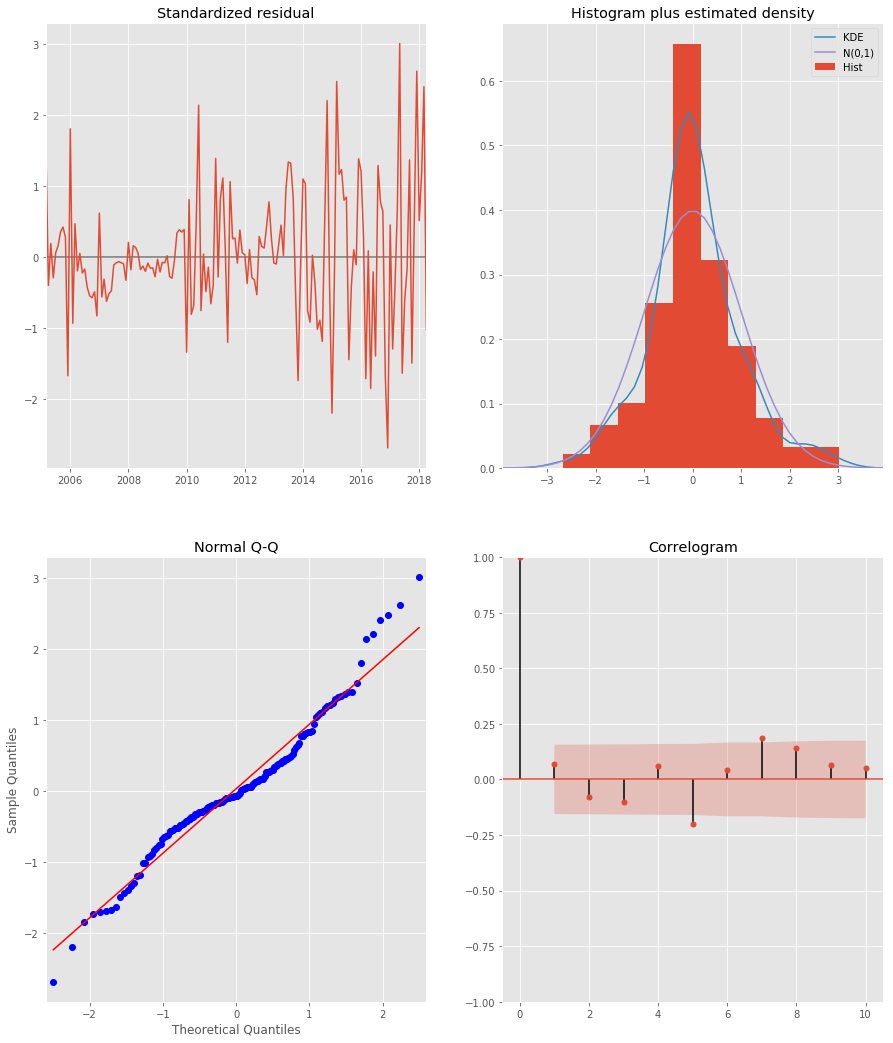

In [48]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [49]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                             Median   No. Observations:                  185
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1678.311
Date:                            Fri, 30 Aug 2019   AIC                           3364.622
Time:                                    09:20:35   BIC                           3376.873
Sample:                                12-01-2002   HQIC                          3369.597
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5700      0.078      7.333      0.000       0.418       0.722
ma.L1          0.4866      0.075      6.520      0.000       0.340       0.633
ma.S.L12      -0.3617      0.039     -9.256      0.000      -0.438      -0.285
sigma2      1.174e+08   1.89e-10    6.2e+17      0.000    1.17e+08    1.17e+08
===================================================================================
Ljung-Box (Q):                       78.04   Jarque-Bera (JB):                12.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.19   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.73e+33. Standard errors may be unstable.
"""

# Step 5: ARIMA Modeling

Now that all the fuctions are defined and working, my next step is to create a dataset with the ARIMA predictions to see what the best zipcodes in Brooklyn are to invest in. I will run this with 2 years from the end of the dataset (so 2020 predictions), and will record the zipcode, mean squared error, value at 2 years, value 5 years previous, value 10 years previous, the lower confidence interval, and the upper confidence interval. 

In [53]:
zip_reals = ny_2004.ZIPCODE.unique()

In [54]:
zip_reals

array([11212, 11214, 11221, 11229, 11234, 11215, 11211, 11233, 11236,
       11218, 11223, 11208, 11204, 11219, 11203, 11220, 11216, 11210,
       11224, 11222, 11228, 11226, 11235, 11230, 11209, 11238, 11205,
       11217])

In [56]:
## Create empty dataframe to store results in
results = pd.DataFrame({'zipcode': [], 'mse': [], 'mean_value': [], '5YA': [], '10YA': [],'lower': [], 'upper':[] })

## For Loop to run an arima model on each zipcode, grouped by zipcode. 
for i in zip_reals:
    # Create dataframe for that zipcode
    df = sampling(ny_2004, i)
    # Get ARIMA parameters
    p = pdqz(df)
    # Run ARIMA Model
    output = arimamodel(df, p)
    # Get MSE   
    mse = MSEr(df, output, '2010-01-01')
    # 5 & 10 Yr Values
    five = df['2015-01-01']
    ten = df['2010-01-01']
    # Get 12 steps ahead value and confidence interval
    futures = future_value(df, output, 24)
    mean = futures[0]
    lower = futures[1]
    upper = futures[2]
    # Store values in new dataframe
    results = results.append({'zipcode': i, 'mse': mse, 'mean_value': mean, '5YA': five, '10YA': ten,'lower': lower, 'upper':upper }, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [57]:
results.head()

,zipcode,mse,mean_value,5YA,10YA,lower,upper
0,11212.0,2.475281e+06,5.184889e+05,303000.0,292200.0,3.609742e+05,6.760035e+05
1,11214.0,1.160290e+07,9.780908e+05,690900.0,507300.0,6.852603e+05,1.270921e+06
2,11221.0,2.146929e+07,1.268332e+06,756100.0,410300.0,1.030659e+06,1.506005e+06
3,11229.0,5.127191e+06,9.484425e+05,572200.0,491300.0,8.232238e+05,1.073661e+06
4,11234.0,4.423621e+06,6.728265e+05,469200.0,419600.0,5.629952e+05,7.826579e+05


In [79]:
#Create Table Calculations
results['growth_10'] = results['mean_value'] - results['10YA']
results['conservative10'] = results['lower'] - results['10YA']
results['risk10'] = results['upper'] - results['10YA']
results['growth_5'] = results['mean_value'] - results['5YA']
results['conservative5'] = results['lower'] - results['5YA']
results['risk5'] = results['upper'] - results['5YA']

In [80]:
results

,zipcode,mse,mean_value,5YA,10YA,lower,upper,growth_10,conservative10,growth_5,conservative5,risk10,risk5
0,11212.0,2.475281e+06,5.184889e+05,303000.0,292200.0,3.609742e+05,6.760035e+05,2.262889e+05,6.877425e+04,2.154889e+05,5.797425e+04,3.838035e+05,3.730035e+05
1,11214.0,1.160290e+07,9.780908e+05,690900.0,507300.0,6.852603e+05,1.270921e+06,4.707908e+05,1.779603e+05,2.871908e+05,-5.639665e+03,7.636213e+05,5.800213e+05
2,11221.0,2.146929e+07,1.268332e+06,756100.0,410300.0,1.030659e+06,1.506005e+06,8.580320e+05,6.203595e+05,5.122320e+05,2.745595e+05,1.095705e+06,7.499046e+05
3,11229.0,5.127191e+06,9.484425e+05,572200.0,491300.0,8.232238e+05,1.073661e+06,4.571425e+05,3.319238e+05,3.762425e+05,2.510238e+05,5.823613e+05,5.014613e+05
4,11234.0,4.423621e+06,6.728265e+05,469200.0,419600.0,5.629952e+05,7.826579e+05,2.532265e+05,1.433952e+05,2.036265e+05,9.379516e+04,3.630579e+05,3.134579e+05
5,11215.0,1.373051e+08,2.483385e+06,1908100.0,1189500.0,1.852694e+06,3.114076e+06,1.293885e+06,6.631936e+05,5.752847e+05,-5.540644e+04,1.924576e+06,1.205976e+06
6,11211.0,1.356521e+08,2.090971e+06,1025700.0,615600.0,1.635359e+06,2.546582e+06,1.475371e+06,1.019759e+06,1.065271e+06,6.096593e+05,1.930982e+06,1.520882e+06
7,11233.0,2.550899e+07,1.033005e+06,526200.0,367800.0,8.577815e+05,1.208228e+06,6.652046e+05,4.899815e+05,5.068046e+05,3.315815e+05,8.404277e+05,6.820277e+05
8,11236.0,4.496777e+06,5.822759e+05,367100.0,365700.0,4.422992e+05,7.222526e+05,2.165759e+05,7.659915e+04,2.151759e+05,7.519915e+04,3.565526e+05,3.551526e+05
9,11218.0,5.939016e+07,1.398821e+06,865100.0,647400.0,9.675243e+05,1.830119e+06,7.514215e+05,3.201243e+05,5.337215e+05,1.024243e+05,1.182719e+06,9.650186e+05


# Step 6: Interpreting Results

For investments, you want to see how much your money will grow, not necessarily what will be the most expensive zipcode to look at. Therefore, I want to focus on zipcodes that have seen the highest 5 year and 10 year growth, rather than looking at those that simply will ahve the highest value in the future. 

Let's start by looking at the top 5 values for Longerterm investing, aka 10 year growth

In [73]:
results.sort_values(by = ['growth_10'], ascending = False).head(5)

,zipcode,mse,mean_value,5YA,10YA,lower,upper,growth_10,conservative10,growth_5,conservative5
27,11217.0,2.228553e+08,4.331640e+06,2758400.0,1544500.0,3.802648e+06,4.860632e+06,2.787140e+06,2.258148e+06,1.573240e+06,1.044248e+06
25,11238.0,1.568551e+08,3.410308e+06,2015200.0,1196100.0,2.829322e+06,3.991294e+06,2.214208e+06,1.633222e+06,1.395108e+06,8.141218e+05
16,11216.0,8.838219e+07,2.037252e+06,1027800.0,490200.0,1.387233e+06,2.687271e+06,1.547052e+06,8.970330e+05,1.009452e+06,3.594330e+05
6,11211.0,1.356521e+08,2.090971e+06,1025700.0,615600.0,1.635359e+06,2.546582e+06,1.475371e+06,1.019759e+06,1.065271e+06,6.096593e+05
19,11222.0,1.394418e+08,1.964674e+06,1169700.0,608500.0,1.455404e+06,2.473943e+06,1.356174e+06,8.469043e+05,7.949736e+05,2.857043e+05


In [75]:
results.sort_values(by = ['conservative10'], ascending = False).head(5)

,zipcode,mse,mean_value,5YA,10YA,lower,upper,growth_10,conservative10,growth_5,conservative5
27,11217.0,2.228553e+08,4.331640e+06,2758400.0,1544500.0,3.802648e+06,4.860632e+06,2.787140e+06,2.258148e+06,1.573240e+06,1.044248e+06
25,11238.0,1.568551e+08,3.410308e+06,2015200.0,1196100.0,2.829322e+06,3.991294e+06,2.214208e+06,1.633222e+06,1.395108e+06,8.141218e+05
6,11211.0,1.356521e+08,2.090971e+06,1025700.0,615600.0,1.635359e+06,2.546582e+06,1.475371e+06,1.019759e+06,1.065271e+06,6.096593e+05
16,11216.0,8.838219e+07,2.037252e+06,1027800.0,490200.0,1.387233e+06,2.687271e+06,1.547052e+06,8.970330e+05,1.009452e+06,3.594330e+05
19,11222.0,1.394418e+08,1.964674e+06,1169700.0,608500.0,1.455404e+06,2.473943e+06,1.356174e+06,8.469043e+05,7.949736e+05,2.857043e+05


In [81]:
results.sort_values(by = ['risk10'], ascending = False).head(5)

,zipcode,mse,mean_value,5YA,10YA,lower,upper,growth_10,conservative10,growth_5,conservative5,risk10,risk5
27,11217.0,2.228553e+08,4.331640e+06,2758400.0,1544500.0,3.802648e+06,4.860632e+06,2.787140e+06,2.258148e+06,1.573240e+06,1.044248e+06,3.316132e+06,2.102232e+06
25,11238.0,1.568551e+08,3.410308e+06,2015200.0,1196100.0,2.829322e+06,3.991294e+06,2.214208e+06,1.633222e+06,1.395108e+06,8.141218e+05,2.795194e+06,1.976094e+06
16,11216.0,8.838219e+07,2.037252e+06,1027800.0,490200.0,1.387233e+06,2.687271e+06,1.547052e+06,8.970330e+05,1.009452e+06,3.594330e+05,2.197071e+06,1.659471e+06
6,11211.0,1.356521e+08,2.090971e+06,1025700.0,615600.0,1.635359e+06,2.546582e+06,1.475371e+06,1.019759e+06,1.065271e+06,6.096593e+05,1.930982e+06,1.520882e+06
5,11215.0,1.373051e+08,2.483385e+06,1908100.0,1189500.0,1.852694e+06,3.114076e+06,1.293885e+06,6.631936e+05,5.752847e+05,-5.540644e+04,1.924576e+06,1.205976e+06


For longer term investments, zipcodes 11217, 11238, 11216, 11211, and 11222 would be the best to invest in. This is Boreum Hill, Prospect Heights, Bed-Stuy, Williamsburg, and Greenpoint. A more risky investment would be 11215, which corresponds to park slope. 

In [76]:
results.sort_values(by = ['growth_5'], ascending = False).head(5)

,zipcode,mse,mean_value,5YA,10YA,lower,upper,growth_10,conservative10,growth_5,conservative5
27,11217.0,2.228553e+08,4.331640e+06,2758400.0,1544500.0,3.802648e+06,4.860632e+06,2.787140e+06,2.258148e+06,1.573240e+06,1.044248e+06
25,11238.0,1.568551e+08,3.410308e+06,2015200.0,1196100.0,2.829322e+06,3.991294e+06,2.214208e+06,1.633222e+06,1.395108e+06,8.141218e+05
6,11211.0,1.356521e+08,2.090971e+06,1025700.0,615600.0,1.635359e+06,2.546582e+06,1.475371e+06,1.019759e+06,1.065271e+06,6.096593e+05
16,11216.0,8.838219e+07,2.037252e+06,1027800.0,490200.0,1.387233e+06,2.687271e+06,1.547052e+06,8.970330e+05,1.009452e+06,3.594330e+05
19,11222.0,1.394418e+08,1.964674e+06,1169700.0,608500.0,1.455404e+06,2.473943e+06,1.356174e+06,8.469043e+05,7.949736e+05,2.857043e+05


In [77]:
results.sort_values(by = ['conservative5'], ascending = False).head(5)

,zipcode,mse,mean_value,5YA,10YA,lower,upper,growth_10,conservative10,growth_5,conservative5
27,11217.0,2.228553e+08,4.331640e+06,2758400.0,1544500.0,3.802648e+06,4.860632e+06,2.787140e+06,2.258148e+06,1.573240e+06,1.044248e+06
25,11238.0,1.568551e+08,3.410308e+06,2015200.0,1196100.0,2.829322e+06,3.991294e+06,2.214208e+06,1.633222e+06,1.395108e+06,8.141218e+05
6,11211.0,1.356521e+08,2.090971e+06,1025700.0,615600.0,1.635359e+06,2.546582e+06,1.475371e+06,1.019759e+06,1.065271e+06,6.096593e+05
23,11230.0,1.792519e+07,1.596380e+06,833600.0,725000.0,1.326125e+06,1.866634e+06,8.713797e+05,6.011254e+05,7.627797e+05,4.925254e+05
10,11223.0,1.848971e+07,1.399716e+06,765700.0,585900.0,1.153249e+06,1.646183e+06,8.138161e+05,5.673489e+05,6.340161e+05,3.875489e+05


In [82]:
results.sort_values(by = ['risk5'], ascending = False).head(5)

,zipcode,mse,mean_value,5YA,10YA,lower,upper,growth_10,conservative10,growth_5,conservative5,risk10,risk5
27,11217.0,2.228553e+08,4.331640e+06,2758400.0,1544500.0,3.802648e+06,4.860632e+06,2.787140e+06,2.258148e+06,1.573240e+06,1.044248e+06,3.316132e+06,2.102232e+06
25,11238.0,1.568551e+08,3.410308e+06,2015200.0,1196100.0,2.829322e+06,3.991294e+06,2.214208e+06,1.633222e+06,1.395108e+06,8.141218e+05,2.795194e+06,1.976094e+06
16,11216.0,8.838219e+07,2.037252e+06,1027800.0,490200.0,1.387233e+06,2.687271e+06,1.547052e+06,8.970330e+05,1.009452e+06,3.594330e+05,2.197071e+06,1.659471e+06
6,11211.0,1.356521e+08,2.090971e+06,1025700.0,615600.0,1.635359e+06,2.546582e+06,1.475371e+06,1.019759e+06,1.065271e+06,6.096593e+05,1.930982e+06,1.520882e+06
19,11222.0,1.394418e+08,1.964674e+06,1169700.0,608500.0,1.455404e+06,2.473943e+06,1.356174e+06,8.469043e+05,7.949736e+05,2.857043e+05,1.865443e+06,1.304243e+06


For the zipcodes that were good investments on the 10 year term, they also make good investments on the 5 year term. There are a few new players in the set: 11230 and 11223, which are Midwood and and Gravesend, which could correspond to the expansion of new zipcodes as the rent prices in the more popular neighborhoods continue to rise.

Overall, consistently we are seeing 11217, 11238, 11211, 11216, and 11222 as the top 5 zipcodes to invest in. There are a few other players, (11223, 11215, and 11230) which could also be considered, however this would be more dependent on investment preferences. 